Jonathan Christopher Gani  
2702223084

## 2. Bank Churn Dataset Source :
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score as r2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
dataset = pd.read_csv("Bank Customer Churn Prediction.csv")
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# overall dataset
dataset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Dataset Explanation :


1.   customer_id (ID datatype) : this column only tells about the account number of each customer, it's like the identifier for each customer data.
2.   credit_score (discrete datatype) : it tells us about how credible each customer to likely having an offer to buy the product from the banks. The lower it gets, it means that the customer is having some difficulties to get some products from the bank. The higher credit_score they has, it means that they are pretty thrustworthy by the bank.
3.   country (nominal datatype): customer's country.
4.   gender (nominal datatype): customer's gender .
5.   age (continous datatype): customer's age.
6.   tenure (ordinal datatype) : it's like the duration of the relationship between the customer and the bank. In this dataset, it means how long the customer have an account in the ABC Multinational Bank.
7.   balance (continue datatype) : how much balance the customer have in the account
8.   products_number (discrete datatype) : it's the total of products each customer have from the bank
9.   credit_card (nominal datatype) : it's like a marker of whether the customer has a credit card (1) or not(0)
10.  active_member (nominal datatype): are they an active member (1) or not (0)
11.  estimated_salary (continue datatype): salary estimation from each customer
12.  churn (nominal datatype): each customer churn status (1) for churn and (0) for not churn.

Basicly this dataset is predicting wether a customer is churning or not from ABC Multinational Bank. Therefore the churn column is gonna be the predicted label, which becomes the y







## Exploratory Data Analysis (EDA)

### Dataset Information

In [5]:
dataset.info()
# this .info() function, tells us each column of the dataset with their own data types, such as int, float, and object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
# showing statistical summary from the dataset
# if we take a look, it will only shows the "numerical" data only, because it's a statistical summary. Therefore the non-numerical data won't be show
dataset.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Check Missing Values

In [7]:
dataset.isna().sum() # we can conclude that this dataset don't have any missing values or we can say that it is clean.
# Therefore we don't have to do any inputation to this dataset

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### Check Duplicated Values

In [8]:
dataset.duplicated().sum()  # this dataset is really good, it even has no duplicated values.
# Therefore, we don't have to remove any duplicated values

0

In [9]:
# ga
dataset[dataset.duplicated()].sum()

customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64

### Check Each Variables Distribution

In [10]:
# shows the possible tenure values
dataset["tenure"].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

In [11]:
# shows the possible products_number values
dataset["products_number"].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

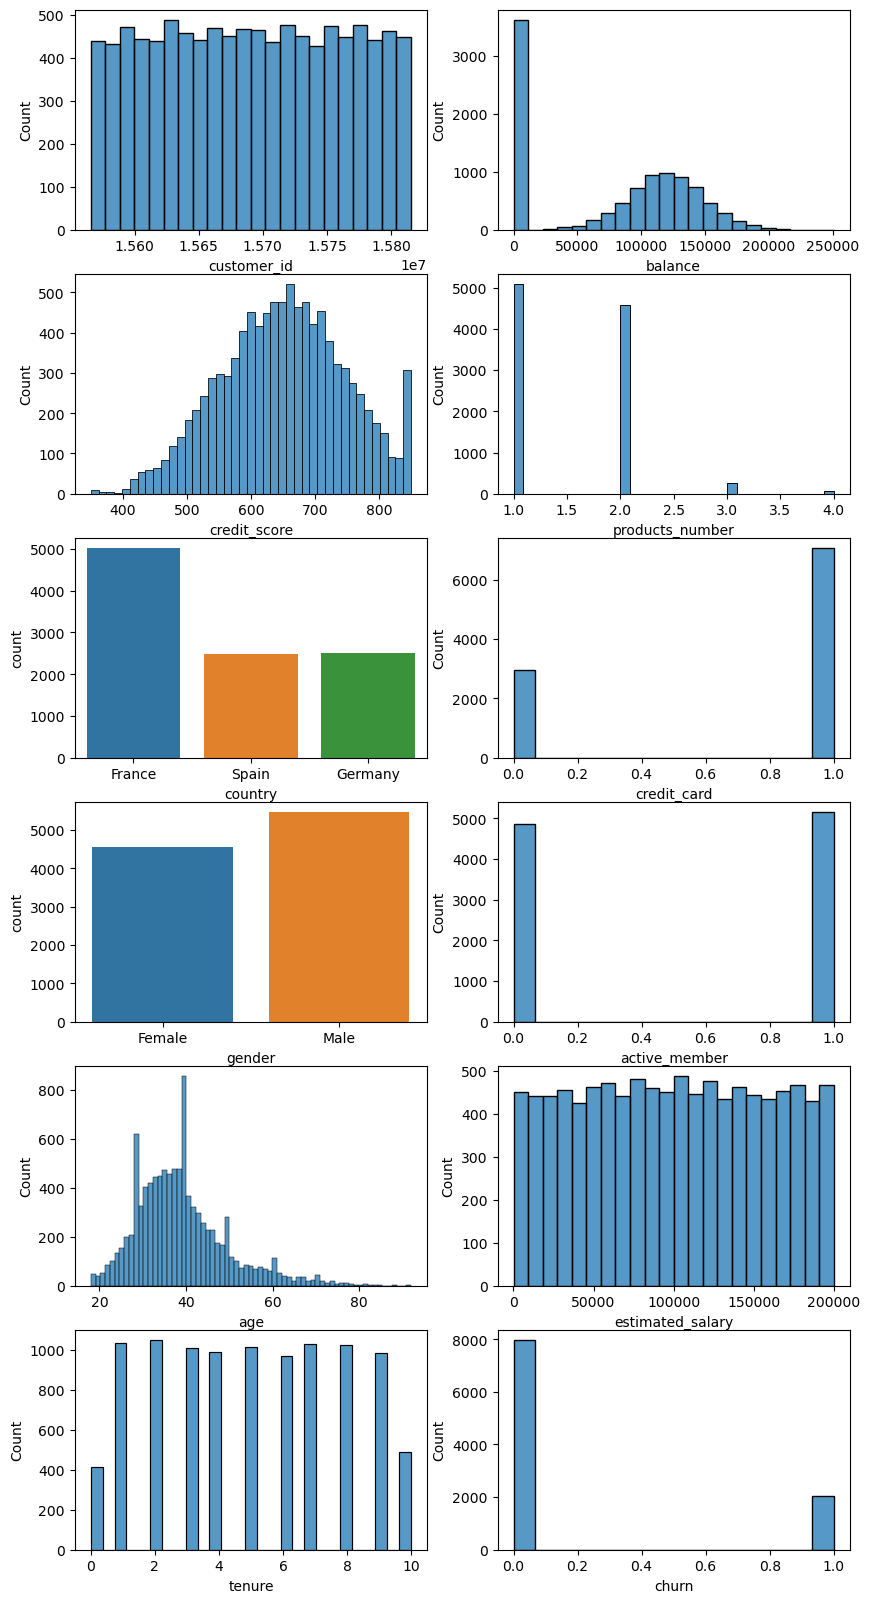

In [12]:
# Plotting the distribution of each variables
figure, axis = plt.subplots(6, 2, figsize=(10, 20))  # making multiple plots with size of 6 rows and 2 columns

# setting index to zero
i = 0
j = 0

for col in dataset.columns: # iterate through each columns
    if(dataset[col].dtype == "int64" or dataset[col].dtype == "float64"):  # only selects the numeric one for using histogram plot
        sns.histplot(data=dataset, x=col, ax=axis[i, j])

    else: # selects the rest of the column, which is non-numeric for using countplot similarly to barplot, but it's more specific to count the frequencies of the categorical data
        sns.countplot(data=dataset, x=col, ax=axis[i, j])

    i += 1  # add up the index
    if(i == 6): # if it's already reached to the 6th rows, than move to the other column
        i = 0
        j = 1


### Check Data Outliers

In [13]:
dataset.columns # we will only check the outliers for the numerical non-binary columns only

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

before going further to the barplot visualization, let's understand the elements in the barplot  
we'll start from top to bottom  
the first one is called upper bound, q3, median, q1, and then lower bound   
the q1, q3, median value are able to be seen by using .describe() function  
for the upper and lower bound we have to count it first

<Axes: ylabel='customer_id'>

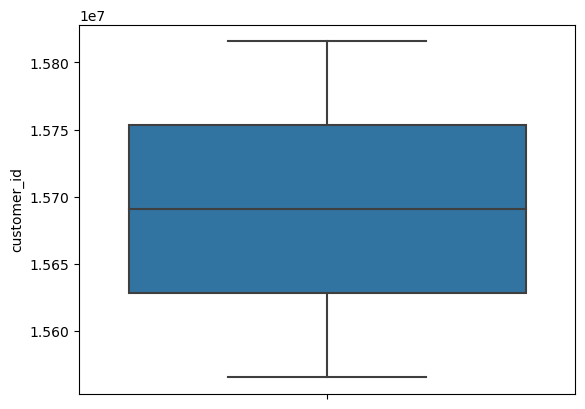

In [14]:
# check customer_id outliers
sns.boxplot(data = dataset, y = "customer_id")  # as we can see, this column has no outliers

<Axes: ylabel='credit_score'>

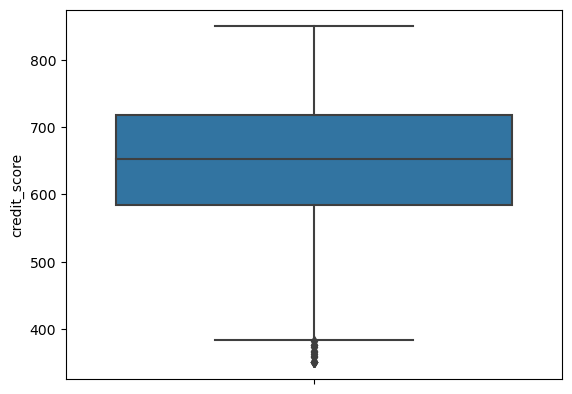

In [15]:
# check credit_score outliers
sns.boxplot(data = dataset, y = "credit_score") # this column has some outliers shown below

In [16]:
dataset["credit_score"].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

In [17]:
q1 = np.percentile(dataset["credit_score"], 25)
q3 = np.percentile(dataset["credit_score"], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(f"The lower bound is : ", lower_bound)
print(f"The upper bound is : ", upper_bound)

The lower bound is :  383.0
The upper bound is :  919.0


In [18]:
(dataset["credit_score"].values < lower_bound).sum()  # therefore we know that the total outliers for credit_score is 15 data

15

<Axes: ylabel='age'>

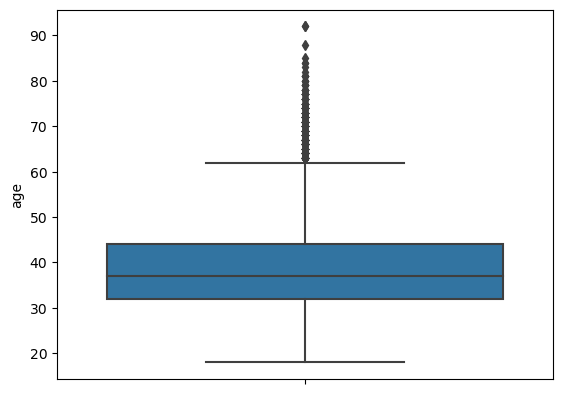

In [19]:
# check age outliers
sns.boxplot(data = dataset, y = "age") # this column has pretty much outliers

In [20]:
dataset["age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

In [21]:
q1 = np.percentile(dataset["age"], 25)
q3 = np.percentile(dataset["age"], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(f"The lower bound is : ", lower_bound)
print(f"The upper bound is : ", upper_bound)

The lower bound is :  14.0
The upper bound is :  62.0


In [22]:
(dataset["age"].values > upper_bound).sum()  # therefore we know that the total outliers for age is 359 data

359

<Axes: ylabel='tenure'>

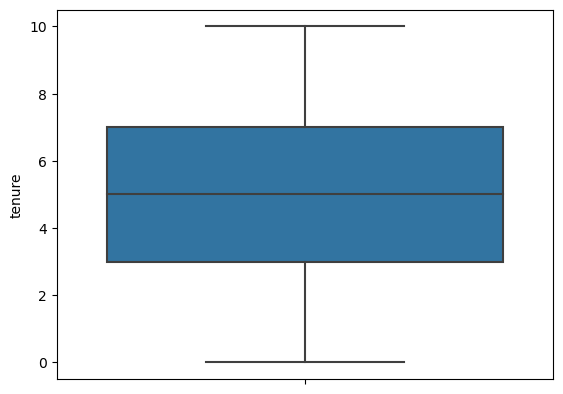

In [23]:
# check tenure outliers
sns.boxplot(data = dataset, y = "tenure") # this column has no outliers data, because all the data is distributed well around 0 to 10

<Axes: ylabel='balance'>

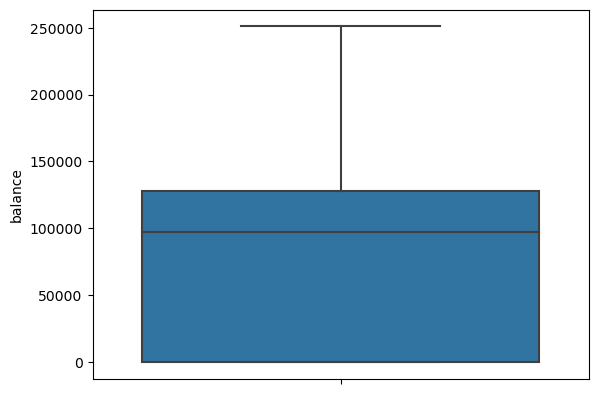

In [24]:
# check balance outliers
sns.boxplot(data = dataset, y = "balance")  # here there's something tricky, because the amount
# of customers who had 0 balance is a lot, therefore i try to exclude the 0 balanced customers

<Axes: ylabel='balance'>

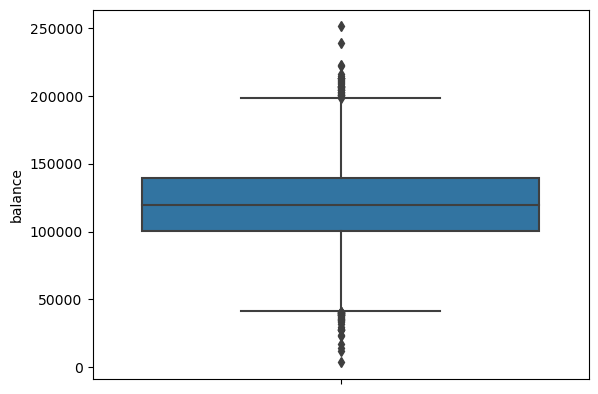

In [25]:
# check balance outliers

filter_balance_0 = dataset[dataset["balance"] != 0]
sns.boxplot(data = filter_balance_0, y = "balance")
# as we can see there are some outliers detected below

<Axes: ylabel='estimated_salary'>

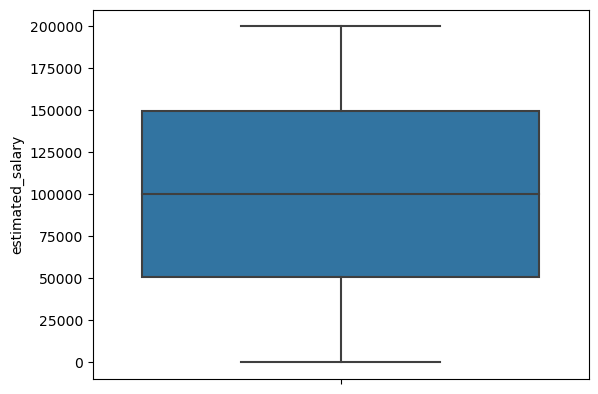

In [26]:
# check estimated_salary outliers
sns.boxplot(data = dataset, y = "estimated_salary")  # this column also has no outliers data

### Visualize Features Distribution

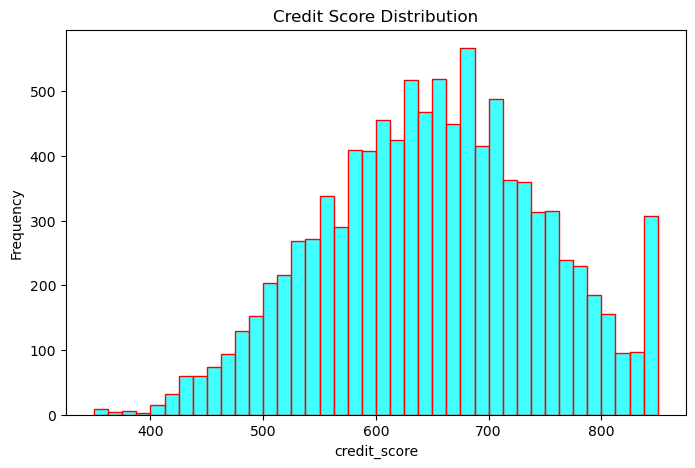

In [27]:
# plotting credit_score feature distribution
plt.figure(figsize=(8, 5))
sns.histplot(dataset['credit_score'], bins=40, color='aqua', edgecolor='red')
plt.title('Credit Score Distribution')
plt.xlabel('credit_score')
plt.ylabel('Frequency')
plt.show()
# This feature is pretty well-distributed, and there aren't too much outlier data

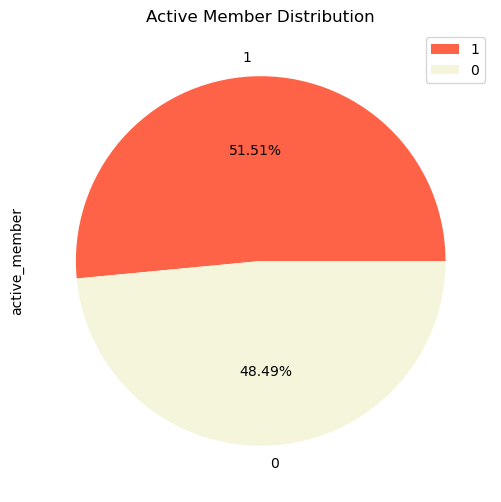

In [28]:
# plotting active_member feature distribution
plt.figure(figsize=(6, 6))
dataset['active_member'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['tomato', 'beige',])
plt.title('Active Member Distribution')
plt.legend()
plt.show()

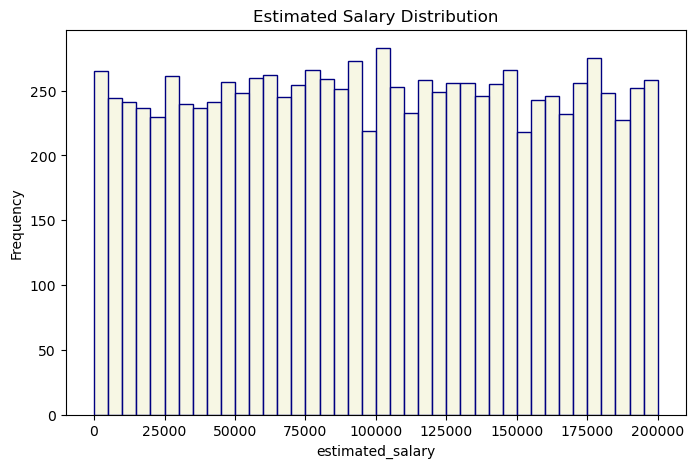

In [29]:
# plotting estimated_salary feature distribution
plt.figure(figsize=(8, 5))
sns.histplot(dataset['estimated_salary'], bins=40, color='beige', edgecolor='navy')
plt.title('Estimated Salary Distribution')
plt.xlabel('estimated_salary')
plt.ylabel('Frequency')
plt.show()
# This feature is pretty well-distributed, and there aren't any outlier data shown below

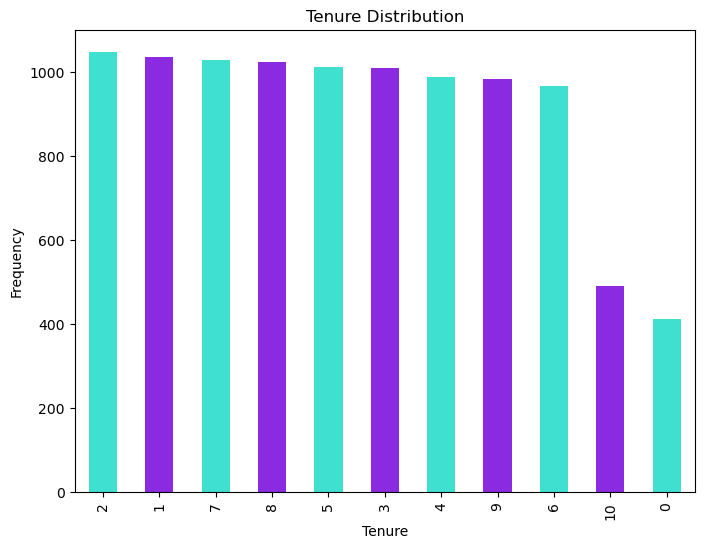

In [30]:
# plotting tenure feature distribution
plt.figure(figsize=(8, 6))
dataset['tenure'].value_counts().plot(kind='bar', color=['turquoise', 'blueviolet'])
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

### Check Correlation Each Variables Using Heatmap
Heatmap only works with numerical columns, therefore we exclude the non-numerical columns

[]

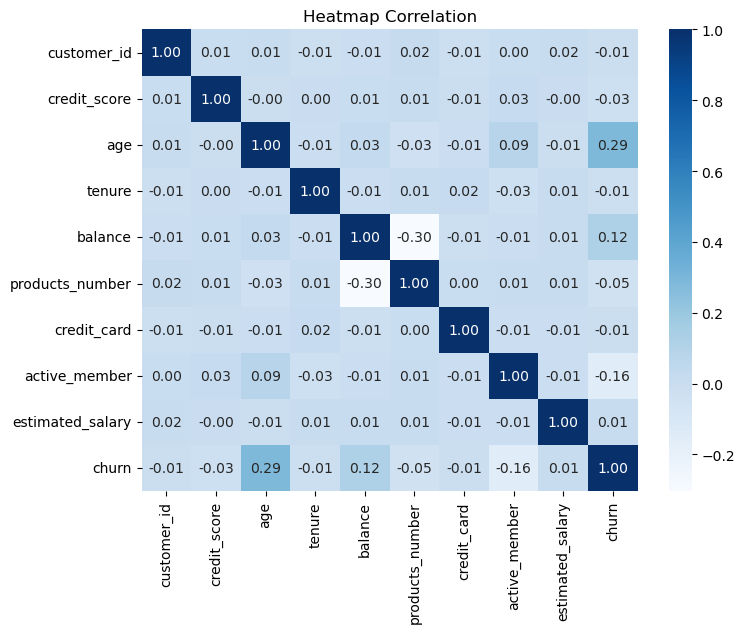

In [31]:
# first, select the numerical datatypes only
num_dataset = dataset.select_dtypes(include=['number'])

# counting the matrix correlation
matrix_corr = num_dataset.corr()

# plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True, cmap='Blues', fmt=".2f") # fmt for rounding 2 digits of number behind
plt.title("Heatmap Correlation")
plt.plot()

As we can see, the correlation between some data is not even nearly correlated at all. The correlation point between all the features showed by the heatmap is pretty low.

### Visualize Some Correlation Between The Data

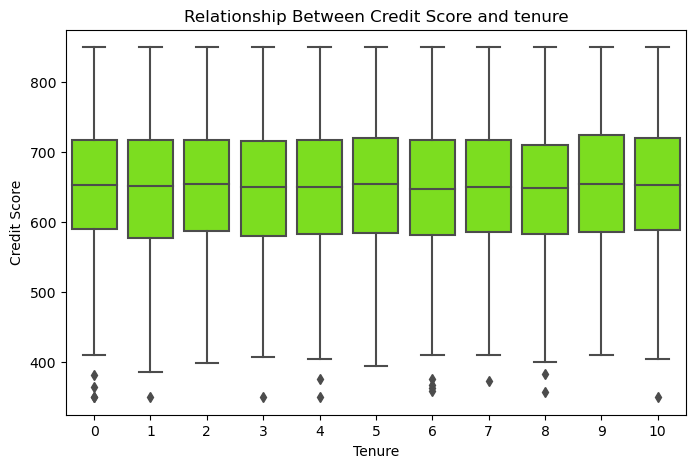

In [32]:
# plotting the relations between credit_score and tenure using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x = dataset['tenure'], y = dataset['credit_score'], color='lawngreen')
plt.title('Relationship Between Credit Score and tenure')
plt.xlabel('Tenure')
plt.ylabel('Credit Score')
plt.show()
# we can assume that the credit score distribution in range 10 possible years are pretty similar, the q1,mean,q3, even the lower and upper bound is so similar.
# The outliers distribution is not too far different from each other, except the 5th and 9th year, they both has no outlier detected
# This means that the tenure didn't affect the credit score

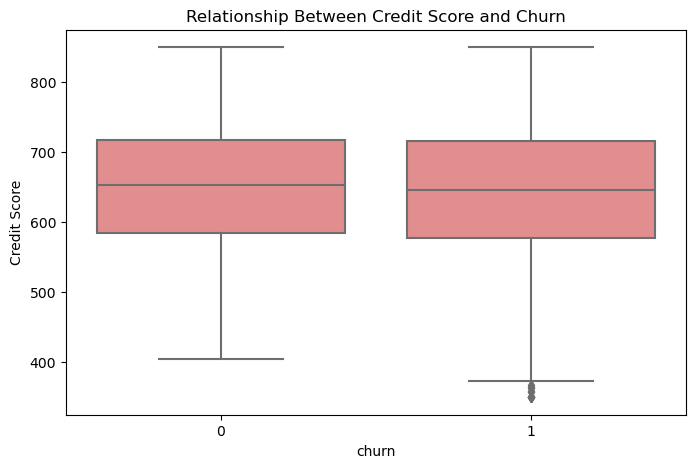

In [33]:
# plotting the relations between credit_score and churn using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x = dataset['churn'], y = dataset['credit_score'], color='lightcoral')
plt.title('Relationship Between Credit Score and Churn')
plt.xlabel('churn')
plt.ylabel('Credit Score')
plt.show()
# we can assume that the credit score distribution in both churned and not churned is pretty similar, they both has similarity from upper bound until q1
# but there is a bit difference in the lower bound, which shows the churned customer, has lower credit score than the non-churned customer, because the lower bound
# is a little bet expanded, and it also showing there are some outliers, which emphasizing that the churned one has lower credit score customer
# This means that the credit score is affecting the churn , because the lower the credit score, the higher probability to churn

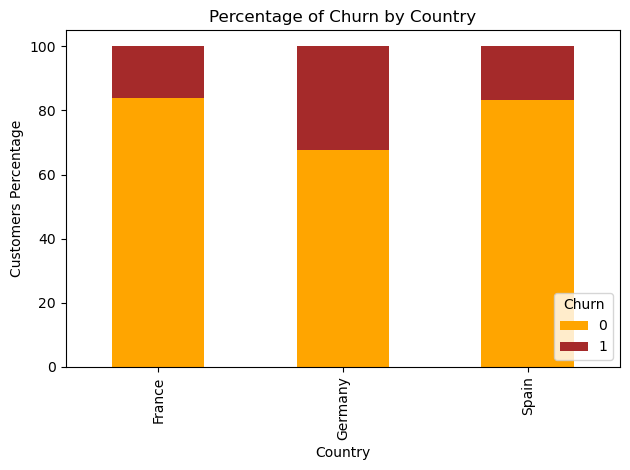

In [34]:
# plotting the relations between country and churn using stacked barplot
data_grouping = dataset.groupby(['country', 'churn']).size().unstack()

# converting to percentage
data_grouping_perc = data_grouping.div(data_grouping.sum(axis=1), axis=0) * 100
data_grouping_perc.plot(kind='bar', stacked=True, color=['orange', 'brown'])

plt.title('Percentage of Churn by Country')
plt.xlabel('Country')
plt.ylabel('Customers Percentage')
plt.legend(title='Churn', loc='lower right')
plt.tight_layout()
plt.show()

# as we can see, the ratio between all three country, germany has the lowest total not-churned but also the highest churned customer
# This means the customers from germany has the most probability to churn /  we could say that the county is affecting the churn probability

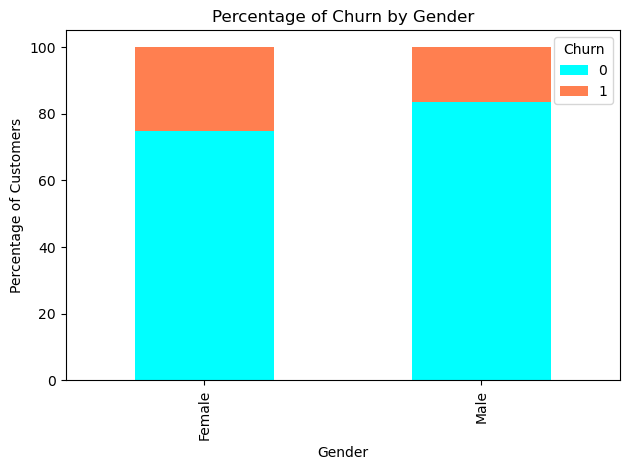

In [35]:
# plotting the relations between gender and churn using stacked barplot
data_grouping = dataset.groupby(['gender', 'churn']).size().unstack()

# converting to percentage
data_grouping_percentage = data_grouping.div(data_grouping.sum(axis=1), axis=0) * 100
data_grouping_percentage.plot(kind='bar', stacked=True, color=['cyan', 'coral'])

plt.title('Percentage of Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

# this graphs tells us that the proportion of female that is not churned is less than the male, but it shows that the female
# has higher number of churn compared to man, which swos that gender is affecting the churn rate

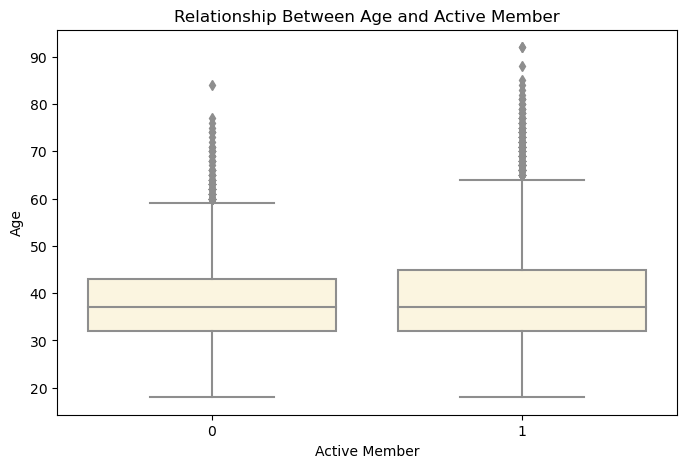

In [36]:
# plotting the relations between age and active_member using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x = dataset['active_member'], y = dataset['age'], color='cornsilk')
plt.title('Relationship Between Age and Active Member')
plt.xlabel('Active Member')
plt.ylabel('Age')
plt.show()
# from the graph below, we can see that the active member has more range of tolerance age.
# which means the older the customer gets, they are most likely to be an active member. So, age is affecting the active member

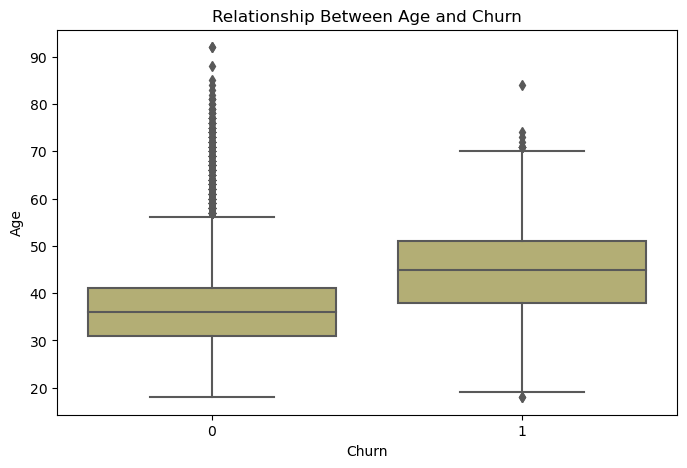

In [37]:
# plotting the relations between age and churn using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x = dataset['churn'], y = dataset['age'], color='darkkhaki')
plt.title('Relationship Between Age and Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()
# This graph below tells us that the age range of not-churned customer is narrower than the churned one.
# this means that the older customer, has more probability to churn, meanwhile the younger one is most likely
# not to churn, therefore it affects

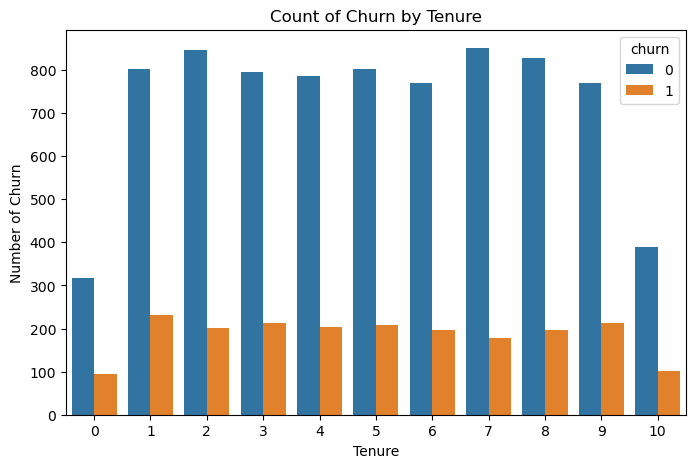

In [38]:
# plotting the relations between tenure and churn using countplot / grouped bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x ='tenure', hue = 'churn', data = dataset)
plt.title('Count of Churn by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Number of Churn')
plt.show()

# this graphs tells us that over the years, there wasn't much change in the churned customer.
# therefore tenure didn't affect the churned customer, because this didn't affect then we can
# exclude this feature during training data

In [39]:
# total balance equals to zero
(dataset["balance"] == 0).sum()

3617

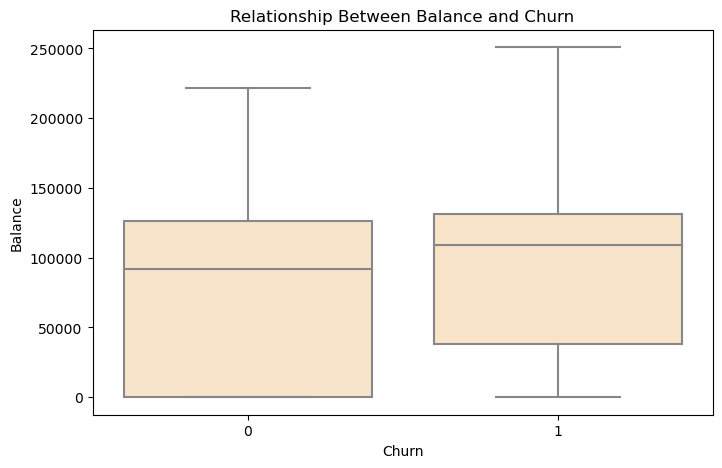

In [40]:
# plotting the relations between balance and churn using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x = dataset['churn'], y = dataset['balance'], color='bisque')
plt.title('Relationship Between Balance and Churn')
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.show()

# there's something tricky here, which is the 0 balance, this 0 balance kinda
# affect the data distribution, because the number of 0 balance is a lot
# about 3617 rows, therefore, i'll try to exclude the 0 balance

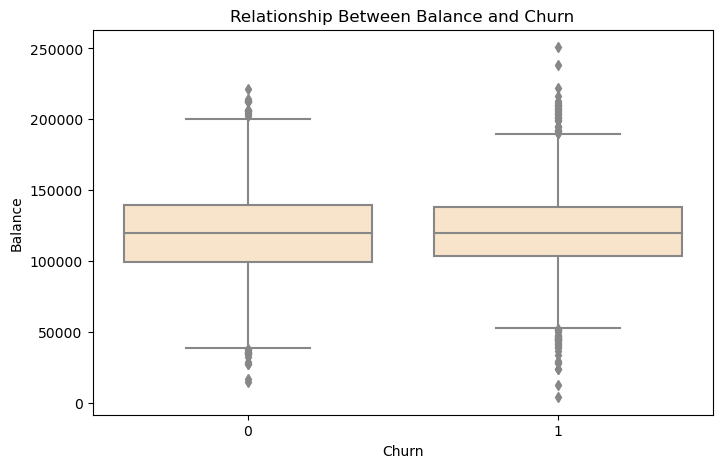

In [41]:
# make new dataset to exclude the 0 balance
dataset_update = dataset[dataset["balance"] != 0]
# plotting the relations between balance and churn using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x = dataset_update['churn'], y = dataset_update['balance'], color='bisque')
plt.title('Relationship Between Balance and Churn')
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.show()
# After excluding the 0 balance, we can conclude that balance didn't affect the churned customer
# it's because the balance range between non-churn and churned is not that much, therefore we can
# exclude this feature during the training data

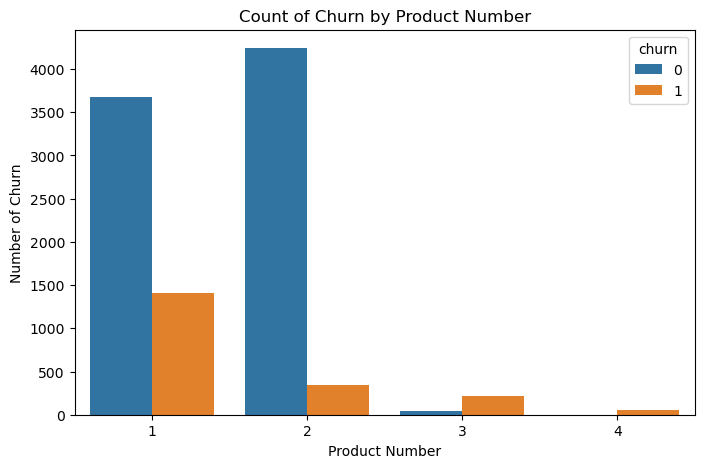

In [42]:
# plotting the relations between products_number and churn using countplot / grouped bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x ='products_number', hue = 'churn', data = dataset)
plt.title('Count of Churn by Product Number')
plt.xlabel('Product Number')
plt.ylabel('Number of Churn')
plt.show()

# this graphs tells us that the average products owned by the customer is around 1 or 2 items, not many customer have more than 2 products.
# most of the non-churned customer only has 2 products, but most of the churned customer is only having 1 product or we can say
# the less number of product each customer have, the more likely they're not churning the bank
# this tells us that product number is affecting churned customer

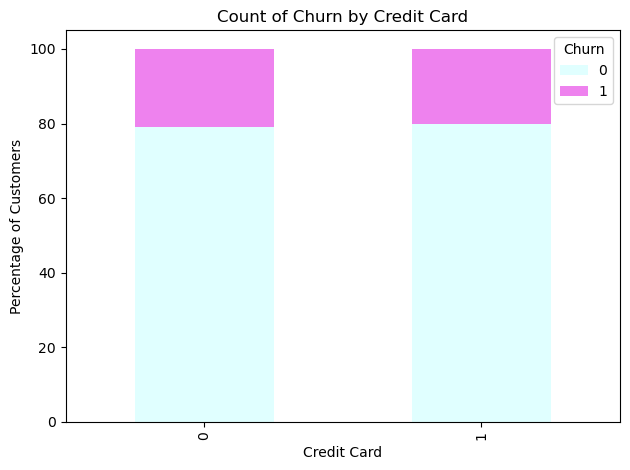

In [43]:
# plotting the relations between credit card and churn using stacked barplot
data_grouping = dataset.groupby(['credit_card', 'churn']).size().unstack()

# converting to percentage
data_grouping_percentage = data_grouping.div(data_grouping.sum(axis=1), axis=0) * 100
data_grouping_percentage.plot(kind='bar', stacked=True, color=['lightcyan', 'violet'])

plt.title('Count of Churn by Credit Card')
plt.xlabel('Credit Card')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

# as we can see, the proportion between has and not has credit card is the same
# even though the total customer of not having credit card is lower, but the
# churned customer proportion between those two is linear, or we can say that it is pretty much similar
# Therefore credit card didn't affecting the churned customer, and we can exclude this during the training data

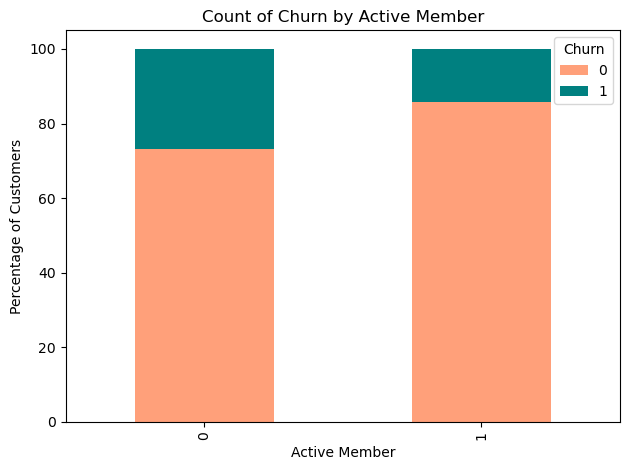

In [44]:
# plotting the relations between active member and churn using stacked barplot
data_grouping = dataset.groupby(['active_member', 'churn']).size().unstack()

# converting to percentage
data_grouping_percentage = data_grouping.div(data_grouping.sum(axis=1), axis=0) * 100
data_grouping_percentage.plot(kind='bar', stacked=True, color=['lightsalmon', 'teal'])

plt.title('Count of Churn by Active Member')
plt.xlabel('Active Member')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

# as we can see, the non-active members has more proportion of churned customer
# meanwhile the active customer has less churned proportion.
# this means that the churned customer is more likely from the non-active members
# Therefore, we could say that active member is affecting the churned customers

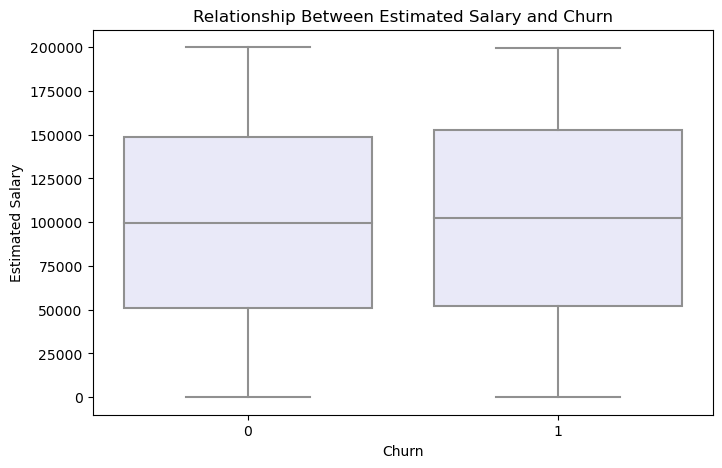

In [45]:
# plotting the relations between estimated salary and churn using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x = dataset['churn'], y = dataset['estimated_salary'], color='lavender')
plt.title('Relationship Between Estimated Salary and Churn')
plt.xlabel('Churn')
plt.ylabel('Estimated Salary')
plt.show()
# From the graph shown below, we can conclude that both of the churned and non-churned customers
# had the same distribution of estimated salary, therefore we could say that the estimated salary
# didn't affect the churned customers, and we can exclude this during training data

## Data Preprocessing

Because there are no missing and duplicated values, therefore we can conclude that this dataset is clean and we don't need to input/drop the problematic data

### Outlier Handling
Because the outlier on credit_score, age and balance columns is not too significant or it's still pretty acceptable, therefore i won't do nothing to handle this.


### Selecting Features

In [46]:
# because i won't be using any customerID to predict churned customer during training, therefore i'll delete the columnS
dataset.drop(columns=["customer_id", "tenure", "balance", "credit_card", "estimated_salary"], inplace=True) # inplace = True, so the dataset is changed straightaway
dataset.head()

,credit_score,country,gender,age,products_number,active_member,churn
0,619,France,Female,42,1,1,1
1,608,Spain,Female,41,1,1,0
2,502,France,Female,42,3,0,1
3,699,France,Female,39,2,0,0
4,850,Spain,Female,43,1,1,0


## Encoding
Because in machine learning training and modelling only allow to accept numerical data, therefore we should encode the categorical to numerical data types

In [47]:
# specify the categorical columns
# in the updated dataset, the categorical columns type is nominal
nominal_columns = ["country", "gender"]
print(nominal_columns)

['country', 'gender']


In [48]:
# one hot encoding
one_hot_encoding = OneHotEncoder(sparse_output=False)
nom_cols_encoded = one_hot_encoding.fit_transform(dataset[nominal_columns])
encoded_dataset = pd.DataFrame(nom_cols_encoded, columns=one_hot_encoding.get_feature_names_out(nominal_columns))
encoded_dataset.head() # check the encoding results

,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0


In [49]:
# combine the encoded columns into the dataframe, and delete the unencoded nominal columns
final_dataset = pd.concat([dataset.drop(columns = nominal_columns), encoded_dataset.astype("int")], axis=1)
final_dataset.head()

,credit_score,age,products_number,active_member,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,1,1,1,1,0,0,1,0
1,608,41,1,1,0,0,0,1,1,0
2,502,42,3,0,1,1,0,0,1,0
3,699,39,2,0,0,1,0,0,1,0
4,850,43,1,1,0,0,0,1,1,0


## Splitting to Train and Test Data


In [50]:
x = final_dataset[final_dataset.columns.drop(["churn"])]  # select the dataset excluding the predicted value which is churn
y = final_dataset["churn"] # as predicted value
x.head()

,credit_score,age,products_number,active_member,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,1,1,1,0,0,1,0
1,608,41,1,1,0,0,1,1,0
2,502,42,3,0,1,0,0,1,0
3,699,39,2,0,1,0,0,1,0
4,850,43,1,1,0,0,1,1,0


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=128)
print(x_train.shape, x_test.shape)  # as we can see, here the train and test data are well separated
# the train data consist of 8k rows and 9 cols, meanwhile the test data consist of 2k rows and 9 cols

(8000, 9) (2000, 9)


# Scaling
changing the scale or range of numerical features to make it more proportional one to another

In [ ]:
# here i'll use robust scaling, because it's more robust to outlier.
# i didn't handle the outliers in my data
# therefore there are still some outliers in my data. but the outliers is still tollerated.

# the features that has outliers are age and creditscore
outliers_cols = ["age", "credit_score"]

# using robust scaler function
robust_scaler = RobustScaler()
x_train[outlieyrs_cols] = robust_scaler.fit_transform(x_train[outliers_cols])  # fitting the scaler into the columns with outlier, remember fitting is only allowed during training
x_test[outliers_cols] = robust_scaler.transform(x_test[outliers_cols])

## Modelling

In [53]:
# training model
model = RandomForestClassifier()
model = model.fit(X = x_train, y = y_train)

In [54]:
# predicting label
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
r2(y_train,y_train_pred)
# the result 0.97... means that this model is really good in explaining the variability
# or we can say that it's almost accurate, because it almost reach 1.0

0.97863043813612

## Evaluate Model
i choose random forest as my machine learning model, because after i try a few model, such as knn, logistic regression, and decision tree, the results is not as good as using random forest. Between this all, decision tree has the highest r2, and the accuracy might not be the highest, but it's pretty good

In [55]:
# this matrix showing the true negative, false positive, false negative, and true positive
print("Confusion Matrix:")  # first step in evaluate model
print(confusion_matrix(y_test, y_pred)) # second step in evaluate model

print("\nClassification Report:")  # showing the classification report from sklearn metric
print(classification_report(y_test, y_pred))
# as we can see here, this model is pretty good in modelling the non churned customer
# the precision, recall, and f1-score is pretty high, so it's pretty accurate
# meanwhile predicting the churned customer is not as good as non churned customer
# but overall it's still acceptable with those results

print("Accuracy:", accuracy_score(y_test, y_pred)) # the accuracy of this model is also pretty good, around 83 %

Confusion Matrix:
[[1490  124]
 [ 213  173]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1614
           1       0.58      0.45      0.51       386

    accuracy                           0.83      2000
   macro avg       0.73      0.69      0.70      2000
weighted avg       0.82      0.83      0.82      2000

Accuracy: 0.8315


## Bonus
### 3. Fine-Tuning using GridSearchCV

In [56]:
# define the parameters for fine tuning
parameters = {
    'n_estimators': [50, 75, 100],      # number of trees
    'max_depth': [8, 14, 20],           # maximum depth
    'min_samples_split': [2, 4, 6],     # minimum samples for splitting
    'min_samples_leaf': [1, 2, 4],      # minimum samples in leaf node
    'bootstrap': [True, False]          # use bootstrap / no
}

rand_for_class = RandomForestClassifier()
grid_search_cv = GridSearchCV(estimator=rand_for_class, param_grid=parameters,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Grid searching inside the training data
grid_search_cv.fit(x_train, y_train)

print(f"Best Hyperparameters: {grid_search_cv.best_params_}")
print(f"Best Accuracy: {grid_search_cv.best_score_}") # the accuracy is around 85

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 50}
Best Accuracy: 0.85975


In [57]:
# finding the best model
best_predict_model = grid_search_cv.best_estimator_
y_pred = best_predict_model.predict(x_test)

# showing the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)) # the accuracy after fine tuning is better around 86 %
print(classification_report(y_test, y_pred)) # the accuracy is increasing from .83 to .86, which is good

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1614
           1       0.74      0.42      0.54       386

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



### 4. ROC Curves and What Does it Tells about classification Model Performance
Receiver Operator Characteristic (ROC)
curves basicly is a graphs that are drawn using True Positive Rates and False Positive rates to provides a summary which consist all of the information from each confusion matrix.
Which tells us the best threshold for making decisions, without checking the confusion matrices manually.

The y-axis shows the true positive rate, which is the same thing as sensitivity.
The true positives rate is the true positives divided by the sum of true positives and false negatives. The x-axis shows the false positive rate, which is the same as 1 - specificity.
The false positive rate is the false positive, divided by the sum of the false positives and true negatives.

How does this works?
First, determine the threshold to divide the samples, and then we'll be able to make the confusion matrix
And then, calculate the true positive rate and the false positive rate.
After that, plot the result of both of them to see the graph.
And then, make a diagonal line which shows the proportion of true positive rate is equal to the proportion of false positive rate
Repeat the process for all the posible threshold.

Basicly, we are trying to use all the possible threshold for each samples, and then we plot it all into the graphs, and connect all the dots, which gives us the ROC Graphs

And then there is an Area Under the Curve (AUC). Basicly it is used to get the number which represents the ability of binary classifier to separate the positive and negative data.
The value is between 0 and 1, where 1 means it is perfectly seperated the positive and negative, otherwise. A model with a value above 0.5 is considered good, and the closer it is to 1, the better.



### 5. Fitting Scalers and Encoders to the Whole Dataset is Taboo, why?
Fitting scalers and encoders to the whole dataset is considered taboo, because it will cause the data to be leaked or the model couldn't predict the unseen / future data properly.
Data leaked could occur because the testing data affect the model during the training process, because the model already seen the data test which it shouldn't have acces during the training process,
which influence the model performance became too optimistic, which is not good for predicting the unseen / future data.

### 6. Jokes Related to Machine Learning
Do you know why you always stand out to me?? Because you're like an outlier, you're rare, unique, and way too special to be ignored.